In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

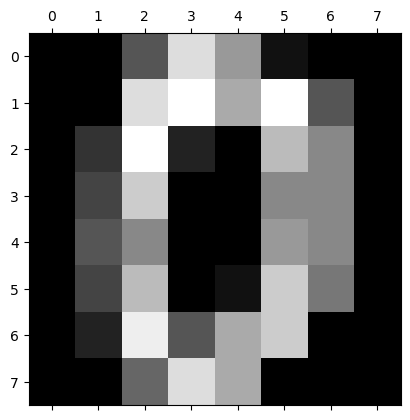

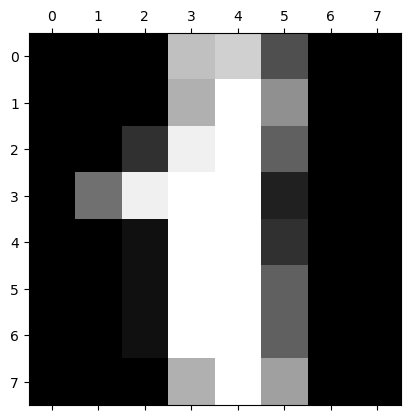

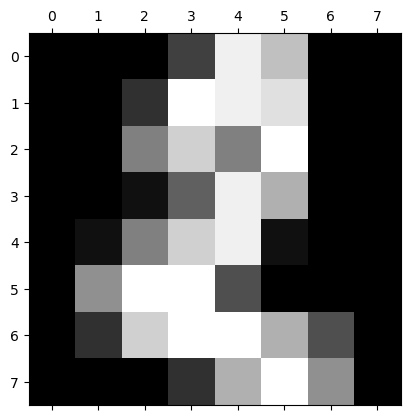

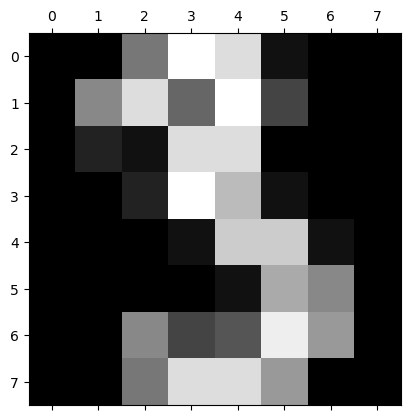

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [8]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [32]:
len(X_test)

360

In [30]:
#to train model, ensemble - when you use multiple algos to predict outcome

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
model.score(X_test,y_test)

0.9805555555555555

In [27]:
y_predicted = model.predict(X_test)

In [33]:
#confusion matrix allows you to plot truth on one axis and prediction on other.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1,  0, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

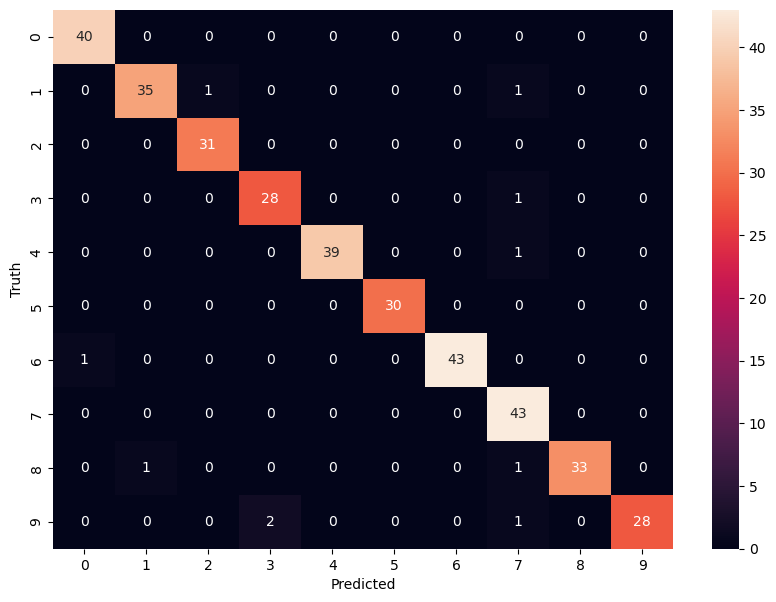

In [40]:
#seaborn to visualise better

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')